# SMS SPAM PREDICTION

Name: KHANDKER SADIA RAHMAN

ID: AI 14

The data used in this assignment includes a public set of SMS labeled messages that have been collected for mobile phone spam researce. Different feature extraction methods and algorithms have been used to determine the best fit model for SPAM detection. The steps are explained below along with the code.

FEATURE EXTRACTION METHODS INCLUDE:

1.CountVectorizer 

2.TfidfVectorizer

ALGORITHMS USED:

1.MultinomialNB

2.Decision Tree

3.KNN

4.Logistic Regression

5.MLPClassifier (Neural Network)


# Steps:

1.The necessary libraries are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import KFold,cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


2.The data provided is first converted to a .csv file and then read into a DataFrame (pandas):

In [2]:
data=pd.read_csv("SMSSpamCollection.csv",header=None,names=["label","message"])

In [3]:
len(data)

5572

In [4]:
data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


3.The SPAM/HAM is converted into binary classes with '1' representing 'HAM' and '0' representing 'SPAM':

In [5]:
data["label"]=data["label"].replace(to_replace="ham",value=1)
data["label"]=data["label"].replace(to_replace="spam",value=0)

In [6]:
data.head(5)

,label,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


3.The data is split into train and test sets using 'train_test_split' where 70% of the data is in the train set and 30% of the data in the test set: 

In [7]:
x=data.message
y=data.label

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [9]:
y_test=np.array(ytest)

4.The 'Countvectorizer' is used for feature extraction and 'MultinomialNB' for prediction:

In [10]:
cv=CountVectorizer()

In [11]:
accuracyCV=[]
for i in range(30):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
    xtrainCV=cv.fit_transform(xtrain)
    xtestCV=cv.transform(xtest)
    mnb1=MultinomialNB() 
    mnb1.fit(xtrainCV,ytrain)
    predCV=mnb1.predict(xtestCV)
    countCV=0
    for i in range(len(ytest)):
        if predCV[i]==y_test[i]:
            countCV+=1
    accuracyCV.append((countCV/len(y_test))*100)
accCV=np.array(accuracyCV).mean()

In [12]:
accCV #FOR CountVectorizer

77.085326953748009

5.The TfidfVectorizer is used for feature extraction and 'MultinomialNB' for prediction:

In [13]:
tv=TfidfVectorizer(min_df=1,stop_words='english')

In [14]:
accuracyTV=[]
for i in range(30):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
    xtrainTV=tv.fit_transform(xtrain)
    xtestTV=tv.transform(xtest)
    mnb=MultinomialNB()
    mnb.fit(xtrainTV,ytrain)
    predTV=mnb.predict(xtestTV)
    countTV=0
    for i in range(len(ytest)):
        if predTV[i]==y_test[i]:
            countTV+=1
    accuracyTV.append((countTV/len(y_test))*100)
accTV=np.array(accuracyTV).mean()    

In [15]:
accTV #FOR TfidfVectorizer

78.841706539074963

Step 4 and 5 is done to see the difference between the performance of 'CountVectorizer' and 'TfidfVectorizer'. Since TfidfVectorizer shows a better performance than the CountVectorizer, it is used in the following sections for feature extraction.

6.In the following section, cross-validation is used for model selection:

A.DECISION TREE

In [16]:
# 30 fold cross-validation with the DT model
dt=DecisionTreeClassifier()
score_dt=cross_val_score(dt,xtrainTV,ytrain,cv=30).mean()*100
print(score_dt)

96.8226021567


B.K NEAREAST NEIGHBOR 

The best k value is selected first and then used for model selection

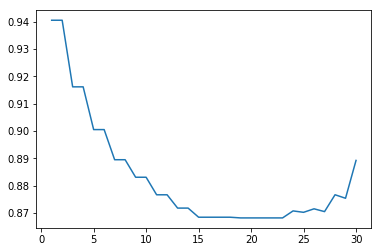

In [17]:
kscore=[]
krange=range(1,31)
for k in krange :
    knn=KNeighborsClassifier(n_neighbors=k)
    score_knn=cross_val_score(knn,xtrainTV,ytrain,cv=14)
    kscore.append(score_knn.mean())

plt.plot(krange,kscore)
plt.show() 


In [18]:
kscore=np.array(kscore)
k=np.where( kscore==kscore.max())
print([i for i in krange])
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


(array([0, 1], dtype=int64),)

Hence the k value corresponds to 1 and 2. Either of the values can be used for maximum accuracy.

In [19]:
# 30 fold cross-validation with the best KNN model
knn=KNeighborsClassifier(n_neighbors=2)
score_knn=cross_val_score(knn,xtrainTV,ytrain,cv=30).mean()*100
print(score_knn)

94.1543058988


C.LOGRITHM REGRESSION

In [20]:
# 30 fold cross-validation with the logistic regression model
logreg=LogisticRegression()
score_lr=cross_val_score(logreg,xtrainTV,ytrain,cv=30).mean()*100
print(score_lr)

94.6694843118


D.NEURAL NETWORK

The hidden_layer_sizes is calculated using cross validation.

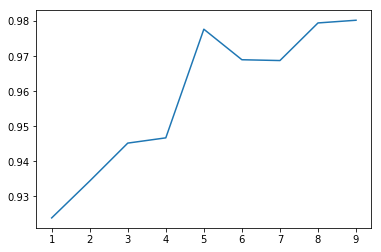

In [21]:
irange=range(1,10)
scoreNN=[]

for i in irange:
    tup=(i,i)
    nn=MLPClassifier(hidden_layer_sizes=tup,activation="relu",solver="lbfgs")
    score_nn=cross_val_score(nn,xtrainTV,ytrain,cv=10)
    scoreNN.append(score_nn.mean())
plt.plot(irange,scoreNN)
plt.show()

In [22]:
scoreNN=np.array(scoreNN)
I=np.where(scoreNN==scoreNN.max())
print([i for i in irange])
I

[1, 2, 3, 4, 5, 6, 7, 8, 9]


(array([8], dtype=int64),)

In [27]:
i=9
tup=(i,i)
nn=MLPClassifier(hidden_layer_sizes=tup,activation="relu",solver="lbfgs",max_iter=200)
score_nn=cross_val_score(nn,xtrainTV,ytrain,cv=30).mean()
score_nn*100
    

97.746877754866404

In [28]:
a1=["CountVectorizer","TfidfVectorizer"]
s1=[accCV,accTV]
r1={"Algorithm":a1,"Score":s1}
result1=pd.DataFrame(data=r1)
a2=["Decision Tree","KNN","Logistic Regression","Neural Network"]
s2=[score_dt,score_knn,score_lr,score_nn*100]
r2={"Algorithm":a2,"Score":s2}
result2=pd.DataFrame(data=r2)
print("COMPARISON BETWEEN CountVectorizer and TfidfVectorizer USING MulitnomialNB:")
print(result1)
print("SCORES OF THE VARIOUS ALGORITHMS:")
print(result2)

COMPARISON BETWEEN CountVectorizer and TfidfVectorizer USING MulitnomialNB:
         Algorithm      Score
0  CountVectorizer  77.085327
1  TfidfVectorizer  78.841707
SCORES OF THE VARIOUS ALGORITHMS:
             Algorithm      Score
0        Decision Tree  96.822602
1                  KNN  94.154306
2  Logistic Regression  94.669484
3       Neural Network  97.746878


From the table above, neural network shows the highest accuracy.

7.USING "K fold cross-validation" INSTEAD OF "train_test_split" FOR "MultinomialNB":

In [29]:
kf=KFold(len(data),n_folds=14)
for train_index,test_index in kf:
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    xtrain_TV=tv.fit_transform(x_train)
    xtest_TV=tv.transform(x_test)
    mnb=MultinomialNB()
    score_mnb=cross_val_score(mnb,xtrain_TV,y_train,cv=30,scoring="accuracy")
accuracy_mnb=score_mnb.mean()*100

In [30]:
accuracy_mnb #MultinomialNB 

97.563942801194287

Hence the MultinomialNB shows a better accuracy when K-fold cross validation is used instead of train test split.